In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('in.csv')

In [2]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [3]:
col=df.columns

In [4]:
for column_names in col:
    if df[column_names].dtypes=='object':
        df[column_names]=df[column_names].fillna(df[column_names].mode()[0])
    else:
        df[column_names]=df[column_names].fillna(df[column_names].mean())
        
        

In [5]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

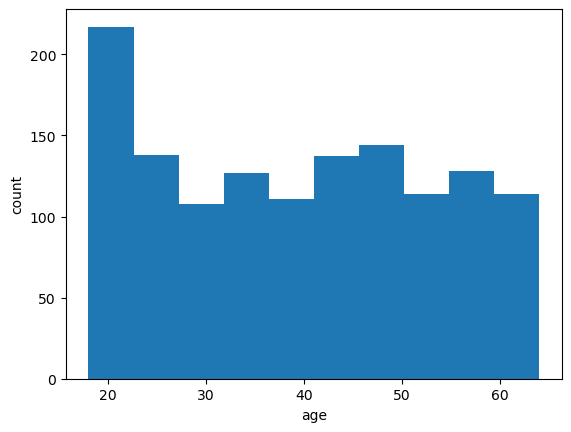

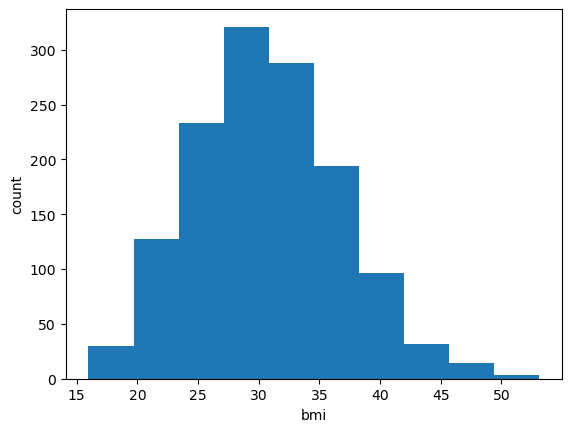

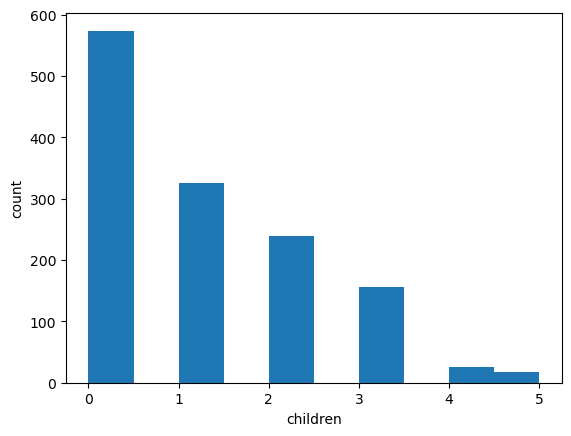

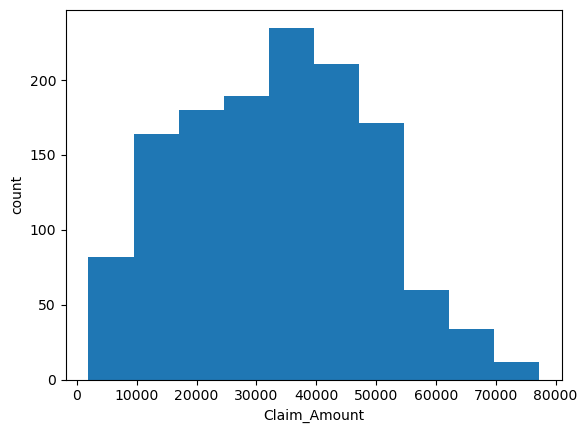

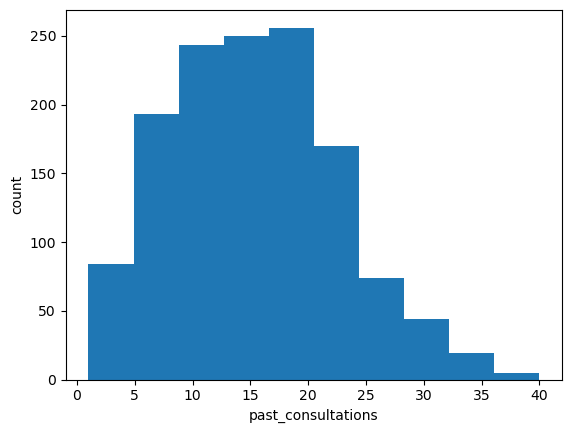

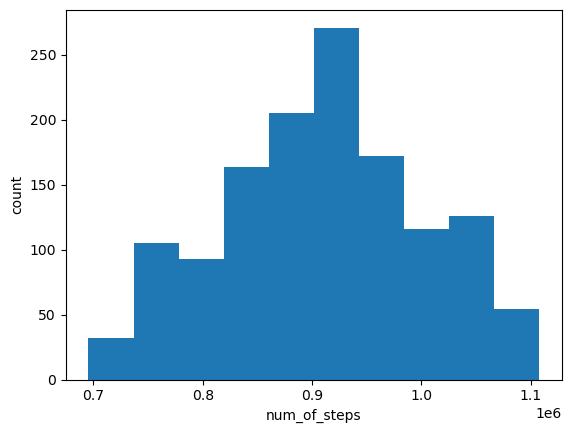

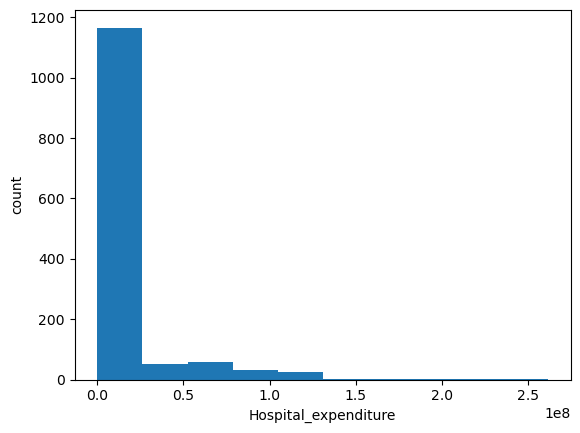

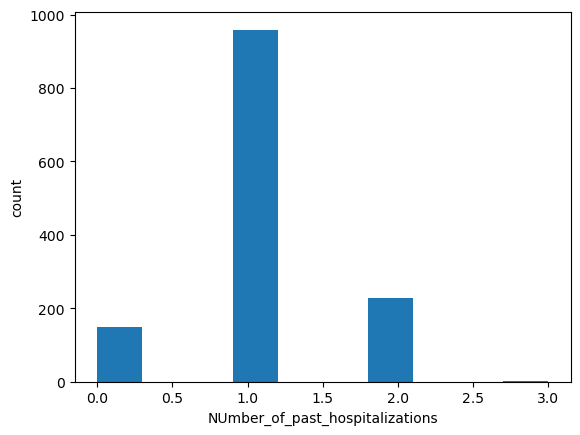

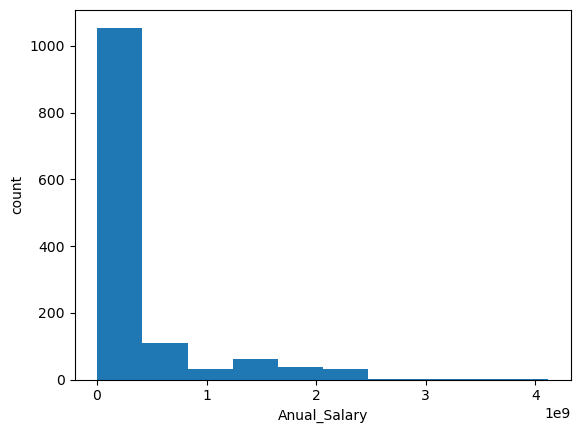

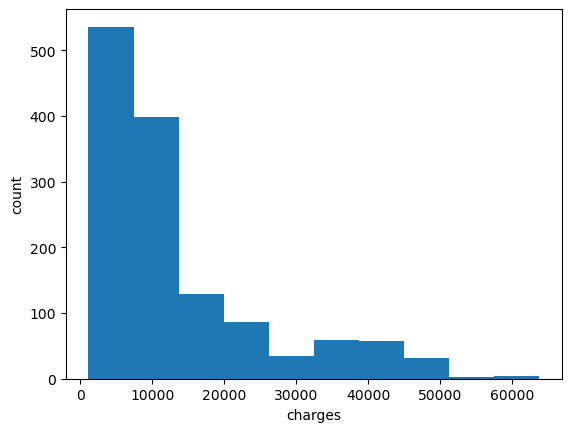

In [6]:
for col_name in col:
    if df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64':
        plt.hist(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
    

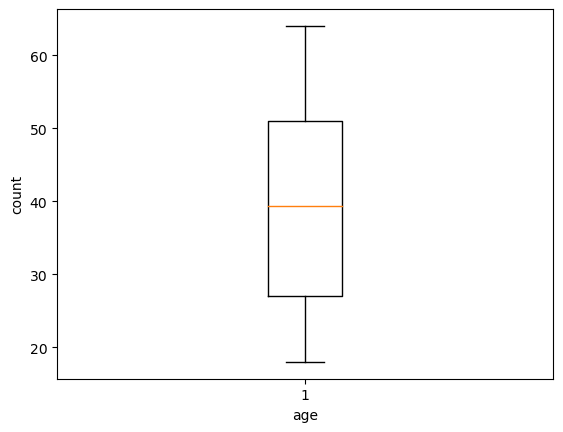

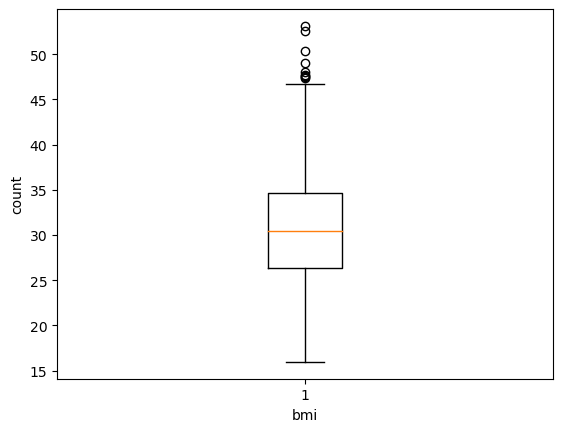

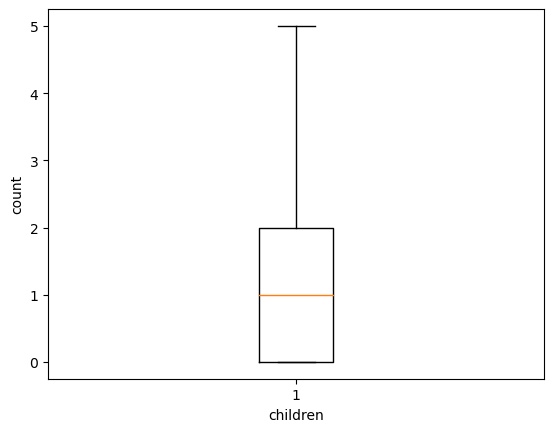

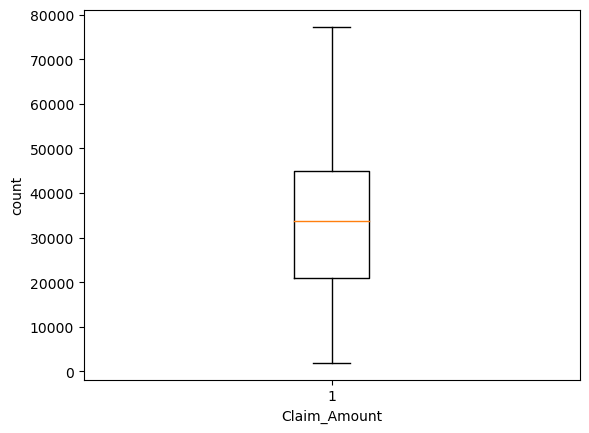

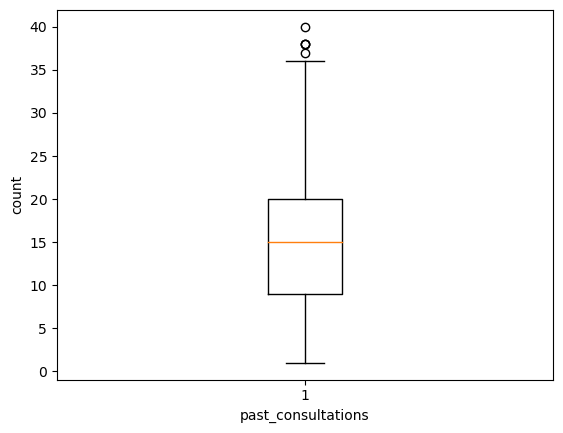

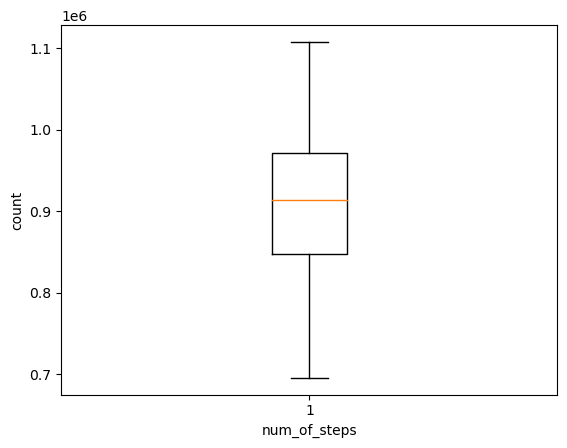

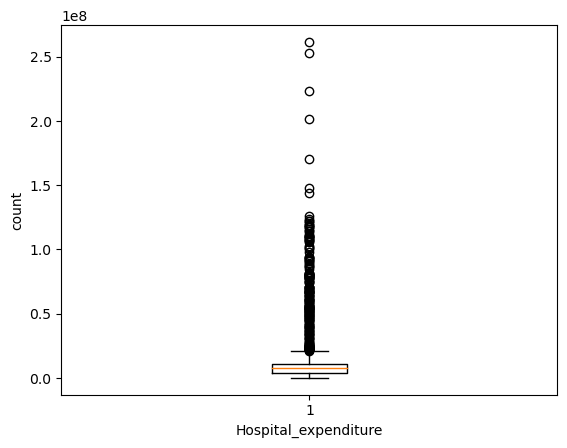

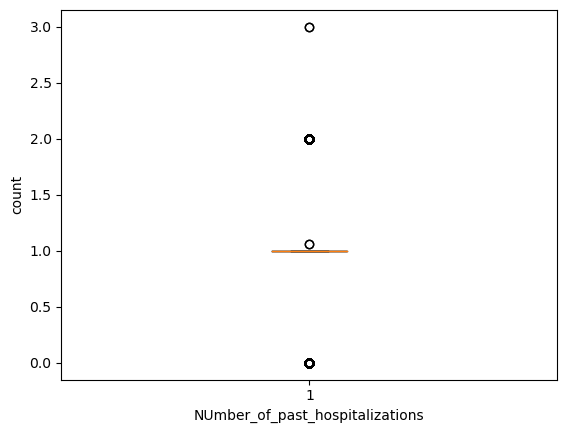

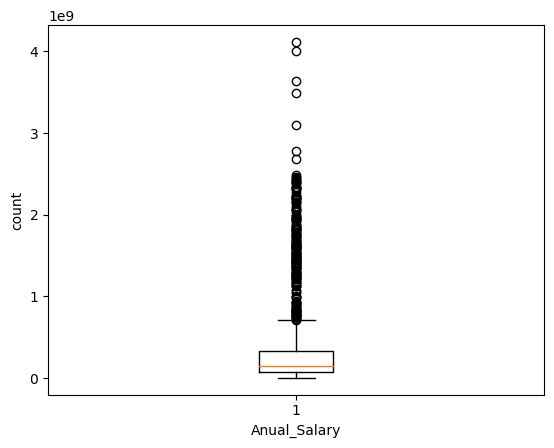

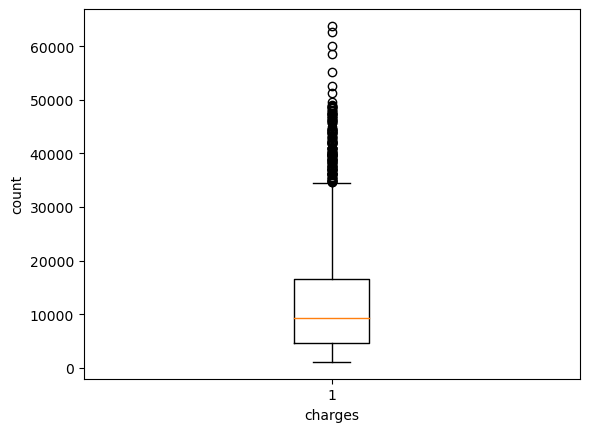

In [7]:
for col_name in col:
    if df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64':
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
    

In [8]:
q1=df.age.quantile(0.25)
q3=df.age.quantile(0.75)

iqr=q3-q1
min1=q1-1.5*iqr
max1=q3+1.5*iqr
df=df[(df['age']>min1)&(df['age']<max1)]

In [9]:
q1=df.past_consultations.quantile(0.25)
q3=df.past_consultations.quantile(0.75)

iqr=q3-q1
min1=q1-1.5*iqr
max1=q3+1.5*iqr
df=df[(df['past_consultations']>=min1)&(df['past_consultations']<=max1)]

In [10]:
q1=df.Anual_Salary.quantile(0.25)
q3=df.Anual_Salary.quantile(0.75)

iqr=q3-q1
min1=q1-1.5*iqr
max1=q3+1.5*iqr
df=df[(df['Anual_Salary']>=min1)&(df['Anual_Salary']<=max1)]

In [11]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)

iqr=q3-q1
min1=q1-1.5*iqr
max1=q3+1.5*iqr
df=df[(df['bmi']>=min1)&(df['bmi']<=max1)]

In [12]:
df.shape

(1131, 13)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='charges')):
        col_list.append(col)


In [15]:
X=df[col_list]
ds=pd.DataFrame()
ds['features']=X.columns
ds['vis']=[variance_inflation_factor(X.values,i) for i in range(len(col_list))]

In [16]:
df=df.drop(['num_of_steps'],axis=1)

In [17]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [18]:
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='charges')):
        col_list.append(col)
X=df[col_list]
ds=pd.DataFrame()
ds['features']=X.columns
ds['vis']=[variance_inflation_factor(X.values,i) for i in range(len(col_list))]        
        

In [19]:
ds

,features,vis
0,age,12.040575
1,bmi,11.870871
2,children,1.999751
3,Claim_Amount,5.511129
4,past_consultations,6.351349
5,Hospital_expenditure,4.719780
6,NUmber_of_past_hospitalizations,11.165967
7,Anual_Salary,4.847567


In [20]:
df=df.drop(['age'],axis=1)

In [21]:
col_list.remove('age')

In [22]:
X=df[col_list]
ds=pd.DataFrame()
ds['features']=X.columns
ds['vis']=[variance_inflation_factor(X.values,i) for i in range(len(col_list))]        


In [23]:
df=df.drop(['bmi'],axis=1)

In [24]:
col_list.remove('bmi')

In [25]:
X=df[col_list]
ds=pd.DataFrame()
ds['features']=X.columns
ds['vis']=[variance_inflation_factor(X.values,i) for i in range(len(col_list))]        


In [26]:
ds

,features,vis
0,children,1.969815
1,Claim_Amount,4.595677
2,past_consultations,5.125776
3,Hospital_expenditure,4.578391
4,NUmber_of_past_hospitalizations,7.592815
5,Anual_Salary,4.418598


In [27]:




df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)
col_list.remove('NUmber_of_past_hospitalizations')

In [28]:
X=df[col_list]
ds=pd.DataFrame()
ds['features']=X.columns
ds['vis']=[variance_inflation_factor(X.values,i) for i in range(len(col_list))]        


In [29]:
ds

,features,vis
0,children,1.716055
1,Claim_Amount,3.997187
2,past_consultations,4.672228
3,Hospital_expenditure,4.429653
4,Anual_Salary,4.093425


In [30]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df.loc[:,['charges']]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [35]:
lmodel=LinearRegression()

In [36]:
lmodel.fit(xtrain,ytrain)

LinearRegression()

In [38]:
predictions=lmodel.predict(xtest)

In [55]:
type(ytest)

pandas.core.frame.DataFrame

In [43]:
error_predictions=pd.DataFrame(columns=['Actual','Predicted'])

In [44]:
error_predictions['Actual']=ytest

In [47]:
error_predictions['Predicted']=predictions

In [48]:
error_predictions.head()

,Actual,Predicted
311,4466.6214,3179.426347
710,9964.0600,5917.005333
298,4399.7310,6834.443386
1148,26140.3603,30120.545644
726,10231.4999,6255.268907


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2=r2_score(ytest,predictions)

In [51]:
r2

0.8335093143358648